# PHASE 3 PROJECT - SYRIA CUSTOMER CHURN.

**Author** : Eugene Maina.

## OVERVIEW

This project has been undertaken to determine how SyriaTel Company can predict if a customer will soon end their subscription to the telephone service.

### Business Problem and Stakeholders.

The stakeholder will be SyriaTel as they assses whether they can determine that a customer will opt-out of their service soon and the predictors that they will opt out.Then I will construct a predictive model that will give recommendations as to how they can reduce their costs incurred by customers who do not stay very long.This could be from reducing capital expenditure or revenue expenditure on certain services they offer.

Overall the main business questions to be answered are:

1. What are the features or determinants of customer churn?
2. What is the customer churn rate and how can it be improved upon based on the data?
3. What is the core services they offer and can costs of other sevices be reduced in order to maximize the core service?

## DATA UNDERSTANDING

* First we need to import the necessary dependencies and then load the dataset to determine what we are dealing with.

* The data set can be found on [Kaggle.com](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download)

In [48]:
# Importing the necessary dependencies.
# Base dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Setting the style of the plots
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Machine learning dependencies
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

#Imbalancing dependencies
%pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


Note: you may need to restart the kernel to use updated packages.


In [49]:
# Opening and previewing the dataset

df = pd.read_csv('data/telephone.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [50]:
# Attaining information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Understanding and describing the data.**
* The dataframe is a summary of records of different phone users, where there from,  how long they have had the phone number, times they called customer service, call information and whether or not they opted out. 
* The dataset comprises of 21 columns an 3333 entries with no missing values.
* The data types are objects, integers, floats and a boolean.

## DATA PREPARATION

### Data Cleaning and Feature Engineering.


* For the purpose of machine learning,the phone number field and the area code field are not required for the model as they serve no purpose and will skew the data.For this we can use pandas to drop the columns.

* Going with the assumption that we are trying to improve overall service delivery at a lower cost,we can neglect the state column as it would create too many features and would'nt generalize properly

* The data also contains object data types that must be encoded in order to build a machine learning model.The boolean target must also be converted to a integer. 

* The numerical data is of different magnitudes,so thus to improve our model performance we can scale them down using Min-max or stsndard scaler depending if they are Gaussian shaped or not.


1. Droping the redundant columns first

In [51]:
# Dropping the columns that are not needed for the analysis
# The columns 'area code', 'phone number', and 'state' are not needed for the analysis
df = df.drop(columns=['area code', 'phone number', 'state'])

df.head()



,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


2. Converting the target column into a numerical binary

In [52]:
# Using pandas to convert the datatype.TimeoutError

df['churn'] = df['churn'].astype(int)

df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


3. Now we need to split the dataset on the basis of datatype to perform the transformations.

In [53]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

print(df_numerical.info())
print()
print(df_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

4. Now we can perform encoding to ensure the categorical variables can be passed through the model. 

In [54]:
# Using sklearn modules to encode the categorical variables

encoder = OneHotEncoder(sparse=False, drop='first')

encoded_categorical = encoder.fit_transform(df_categorical)
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(df_categorical.columns))

encoded_categorical_df.head()

c:\Users\eugene.maina\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,international plan_yes,voice mail plan_yes
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


5. Then we can transform the numerical values using either `MinMaxScaler` or `StandardScaler` depending on whether or not they have a Gaussian distribution.To do this, we can use the `.describe` method to provide insights.

In [55]:
print(df_numerical.describe().T)
print(' \n----------------------\n')
print(df_numerical.mode().T)

                         count        mean        std    min     25%     50%  \
account length          3333.0  101.064806  39.822106   1.00   74.00  101.00   
number vmail messages   3333.0    8.099010  13.688365   0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389   0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084   0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435   0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844   0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625   0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668   0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847  23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609  33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873   1.04    7.52    9.05   
total intl minutes      3333.0   10.2372

* From the results, it suggests that only account length and customer service cells have a Non-Gaussian distribution(since the mean, median and mode are not equal), thus these columns will be scaled using `MinMaxScaler` and the others using `StandardScaler`

In [56]:
# Converting the Gaussian columns.

gaussian_columns = df_numerical.drop(columns=['account length', 'customer service calls'])

gaussian_scaler = StandardScaler()

gaussian_scaled = gaussian_scaler.fit_transform(gaussian_columns)

gaussian_scaled = pd.DataFrame(gaussian_scaled, columns=gaussian_columns.columns)

gaussian_scaled.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885


In [57]:
# Now to convert the non-gaussian columns

non_gaussian_columns = ['customer service calls', 'account length']

non_gaussian_df = df_numerical[non_gaussian_columns]

scaler = MinMaxScaler()

scaled = scaler.fit_transform(non_gaussian_df)

ng_scaled = pd.DataFrame(scaled, columns=non_gaussian_df.columns)

ng_scaled.head()



,customer service calls,account length
0,0.111111,0.524793
1,0.111111,0.438017
2,0.000000,0.561983
3,0.222222,0.342975
4,0.333333,0.305785


* Now to bring the encoded and the scaled dataframes together.

In [58]:
# Using the pandas functions to perform operations

transformed_df = pd.concat([gaussian_scaled, ng_scaled, encoded_categorical_df, df['churn']], axis = 1)

transformed_df.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,account length,international plan_yes,voice mail plan_yes,churn
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,0.111111,0.524793,0.0,1.0,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,0.111111,0.438017,0.0,1.0,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,0.000000,0.561983,0.0,0.0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.222222,0.342975,1.0,0.0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,0.333333,0.305785,1.0,0.0,0


## DATA MODELLING.

* Now that we have transformed the data sets into something passable into a logistic regression model,we can now declare the target and the predictors, split the data, create a base model then evaluate it.

* It would also be wise to view the disribution in the target variable before splitting the data.This will help us set a baseline churn rate which can guide us find solutions that reduce the churn rate. This can be through cancelling certain services(features) that contribute to a positive uptick in churns.

In [59]:
# Declaring the variables

y = transformed_df['churn']
X = transformed_df.drop(columns=['churn'])

# Viewing results of the target to see imbalance.

y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

* We can set the baseline true churn rate to about 14.4%

* Now we can split the data to prepare it for our baseline model.The test size will be set to 0.25 and with a random state of 42.

In [60]:
# Splitting the data used sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



* We then can create our baseline model, for this particular problem, since it is binary we can ise the 'liblinear' solver and set the C to 1e16 to reduce the penalization.Intercept will be set to false.

**Baseline Model**

In [61]:
# Instatiating the model
logreg = LogisticRegression(C=1e16, solver='liblinear', fit_intercept=False)

#Fitting the model
baseline_model = logreg.fit(X_train,y_train)

# Predicting the model
y_pred = logreg.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.96      0.92       709
           1       0.54      0.25      0.34       125

    accuracy                           0.86       834
   macro avg       0.71      0.61      0.63       834
weighted avg       0.83      0.86      0.83       834



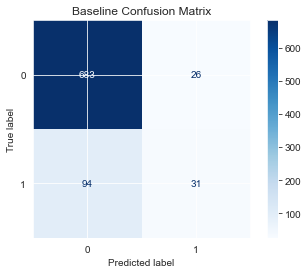

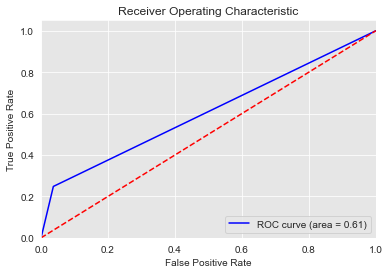

In [62]:
# Using the confusion matrix to evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Baseline Confusion Matrix')
plt.show()

# Using the ROC curve to evaluate the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* From the initial analysis its shows that the model performs well in terms of precision, f1-score and recall in determining the ones who do not churn but poorly for the ones that do. This suggests thst the model is imbalanced towards the 'True Negative' side. To rectify this,we can use the `SMOTE` technique from `imblearn` this ensures the data is split into equal targets.

* The ROC score is also poor at 0.61 which means other models should be created to improve the score.

**Oversampling the Minority class**

In [63]:
# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Checking the balance of the resampled data
y_train_resampled.value_counts(normalize=True)


1    0.5
0    0.5
Name: churn, dtype: float64

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       709
           1       0.36      0.78      0.49       125

    accuracy                           0.76       834
   macro avg       0.65      0.76      0.66       834
weighted avg       0.86      0.76      0.79       834



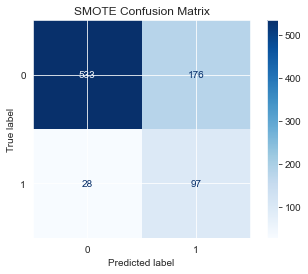

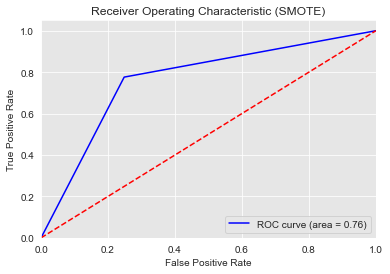

In [64]:
# refitting the model with the resampled data
logreg = LogisticRegression(C=1e16, solver='liblinear', fit_intercept=False)

# Fitting the model
smote_model = logreg.fit(X_train_resampled, y_train_resampled)

# Predicting the model
y_pred_smote = logreg.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_smote))

# Using the confusion matrix to evaluate the model
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=logreg.classes_)
disp_smote.plot(cmap=plt.cm.Blues)
plt.title('SMOTE Confusion Matrix')
plt.show()

# Using the ROC curve to evaluate the model
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SMOTE)')
plt.legend(loc='lower right')
plt.show()


The `SMOTE` model performed better in terms of recall with both having relatively the same values but it is even worse in terms of precision of the true results.Maybe if we can try Undersampling the majority class it may fix this.


**Under sampling the Majority class**

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       709
           1       0.37      0.78      0.50       125

    accuracy                           0.76       834
   macro avg       0.66      0.77      0.67       834
weighted avg       0.86      0.76      0.79       834



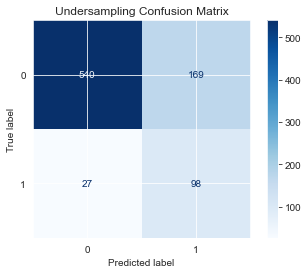

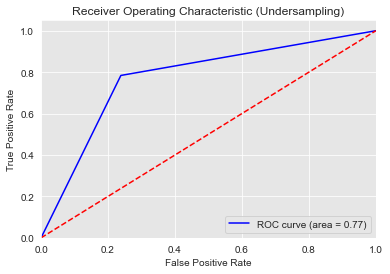

In [65]:
# Using undersampling to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Checking the balance of the undersampled data
y_train_under.value_counts(normalize=True)

# refitting the model with the undersampled data
logreg = LogisticRegression(C=1e16, solver='liblinear', fit_intercept=False)

# Fitting the model
under_model = logreg.fit(X_train_under, y_train_under)

# Predicting the model
y_pred_under = logreg.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_under))

# Using the confusion matrix to evaluate the model
cm_under = confusion_matrix(y_test, y_pred_under)
disp_under = ConfusionMatrixDisplay(confusion_matrix=cm_under, display_labels=logreg.classes_)
disp_under.plot(cmap=plt.cm.Blues)
plt.title('Undersampling Confusion Matrix')
plt.show()

# Using the ROC curve to evaluate the model
fpr_under, tpr_under, thresholds_under = roc_curve(y_test, y_pred_under)
roc_auc_under = auc(fpr_under, tpr_under)
plt.figure()
plt.plot(fpr_under, tpr_under, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_under)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Undersampling)')
plt.legend(loc='lower right')
plt.show()

* The `RandomUnderSampler` did not make much of a differnce in the evaluation metrics of precision recall and F1 score. It seems it is 0.01 better in ters of ROC score.

* Perhaps we can use different techiques such as cross validation to build a better model.

**Logistic Regression with Cross Validation**

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.66      0.17      0.27       125

    accuracy                           0.86       834
   macro avg       0.76      0.58      0.60       834
weighted avg       0.84      0.86      0.83       834



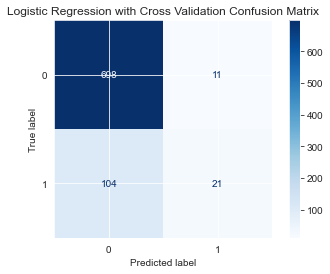

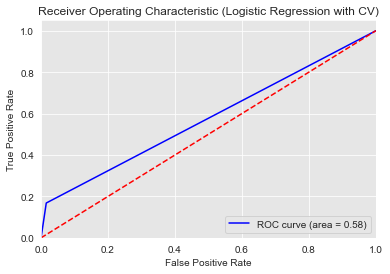

In [66]:
# Using Logistic Regression with Cross Validation
logreg_cv = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000)
logreg_cv.fit(X_train, y_train)
y_pred_cv = logreg_cv.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_cv))

# Using the confusion matrix to evaluate the model
cm_cv = confusion_matrix(y_test, y_pred_cv)
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=logreg_cv.classes_)
disp_cv.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression with Cross Validation Confusion Matrix')
plt.show()

# Using the ROC curve to evaluate the model
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_test, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)
plt.figure()
plt.plot(fpr_cv, tpr_cv, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression with CV)')
plt.legend(loc='lower right')
plt.show()


* The model did much better in terms of precision with an improvement to 0.66 from 0.37 however, the recall suffered and went back to 0.17 from an impressive 0.78.The F1 score also suffered as a result.If can try to combine the models(smote and cross validation) perhaps we can attain better results.

**Logistic Regression with cross validation with SMOTE**

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       709
           1       0.39      0.78      0.52       125

    accuracy                           0.78       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.87      0.78      0.81       834



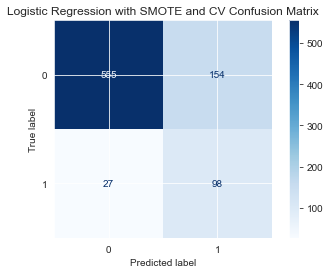

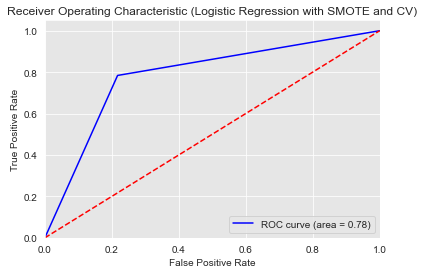

In [67]:
# Combining Logistic Regression with SMOTE and Cross Validation
logreg_smote_cv = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000)
logreg_smote_cv.fit(X_train_resampled, y_train_resampled)
y_pred_smote_cv = logreg_smote_cv.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_smote_cv))

# Using the confusion matrix to evaluate the model
cm_smote_cv = confusion_matrix(y_test, y_pred_smote_cv)
disp_smote_cv = ConfusionMatrixDisplay(confusion_matrix=cm_smote_cv, display_labels=logreg_smote_cv.classes_)
disp_smote_cv.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression with SMOTE and CV Confusion Matrix')
plt.show()

# Using the ROC curve to evaluate the model
fpr_smote_cv, tpr_smote_cv, thresholds_smote_cv = roc_curve(y_test, y_pred_smote_cv)
roc_auc_smote_cv = auc(fpr_smote_cv, tpr_smote_cv)
plt.figure()
plt.plot(fpr_smote_cv, tpr_smote_cv, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_smote_cv)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression with SMOTE and CV)')
plt.legend(loc='lower right')
plt.show()

* The model is better in terms of recall with Oversampling performed however the precision for the churn rate is still poor.The F1 score however seems to improve.

* Perhaps it is maybe a case of selecting features that may improve the model.For this we can use the `RFECV` technique that would select the best features that suit the model.

**Logistic Regression with RFE Cross Validation**

Selected features: Index(['number vmail messages', 'total day minutes', 'total day charge',
       'total eve minutes', 'total eve charge', 'total night minutes',
       'total night charge', 'total intl minutes', 'total intl charge',
       'voice mail plan_yes'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       709
           1       0.36      0.03      0.06       125

    accuracy                           0.85       834
   macro avg       0.61      0.51      0.49       834
weighted avg       0.78      0.85      0.79       834



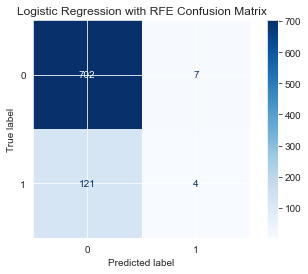

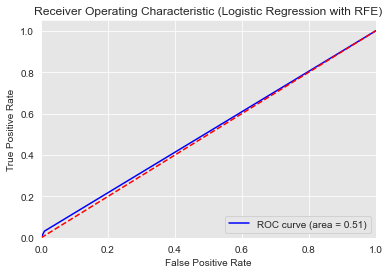

In [68]:
# Using RFECV to select the best features and number of features
logreg_rfe = LogisticRegression(C=1e16, solver='liblinear', fit_intercept=False)
rfe = RFECV(estimator=logreg_rfe, step=1, cv=5)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

# Fitting the model with the selected features
logreg_rfe.fit(X_train[selected_features], y_train)
y_pred_rfe = logreg_rfe.predict(X_test[selected_features])

# Evaluating the model
print(classification_report(y_test, y_pred_rfe))

# Using the confusion matrix to evaluate the model
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=logreg_rfe.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression with RFE Confusion Matrix')
plt.show()

# Using the ROC curve to evaluate the model
fpr_rfe, tpr_rfe, thresholds_rfe = roc_curve(y_test, y_pred_rfe)
roc_auc_rfe = auc(fpr_rfe, tpr_rfe)
plt.figure()
plt.plot(fpr_rfe, tpr_rfe, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_rfe)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression with RFE)')
plt.legend(loc='lower right')
plt.show()
  

* Even after removing some features the model seems to be performing much worse  in terms of percision and recall of the positive churn rate.However the accuracy score is much better.

* The best model in terms of the evaluation metrics is the Logistic regression covariance with SMOTE and with a little hyparametric tuning of the `C` and the penalization techniques such as `l1` and `l2` within the model might improve the precision and f1 score.

**SMOTE Logistic Regression with covariance (hyper-parameter tuned)** - **FINAL MODEL**

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       709
           1       0.39      0.78      0.52       125

    accuracy                           0.78       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.87      0.78      0.81       834



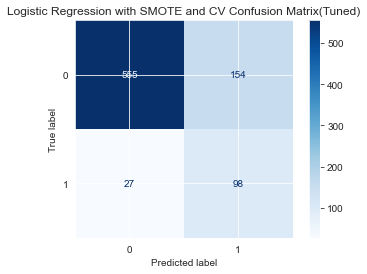

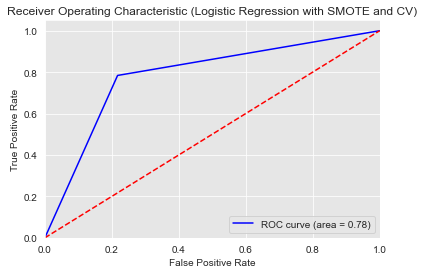

In [69]:
# Tuning the C and penalty parameters for the Logistic Regression model CV
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
logreg_smote_cv = LogisticRegressionCV(penalty='l2',
                                        Cs=Cs,
                                        solver='liblinear',
                                        scoring='f1', 
                                        cv=5, 
                                        random_state=42, 
                                        max_iter=1000)
logreg_smote_cv.fit(X_train_resampled, y_train_resampled)
y_pred_smote_cv = logreg_smote_cv.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_smote_cv))

# Using the confusion matrix to evaluate the model
cm_smote_cv = confusion_matrix(y_test, y_pred_smote_cv)
disp_smote_cv = ConfusionMatrixDisplay(confusion_matrix=cm_smote_cv, display_labels=logreg_smote_cv.classes_)
disp_smote_cv.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression with SMOTE and CV Confusion Matrix(Tuned)')
plt.show()

# Using the ROC curve to evaluate the model
fpr_smote_cv, tpr_smote_cv, thresholds_smote_cv = roc_curve(y_test, y_pred_smote_cv)
roc_auc_smote_cv = auc(fpr_smote_cv, tpr_smote_cv)
plt.figure()
plt.plot(fpr_smote_cv, tpr_smote_cv, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_smote_cv)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression with SMOTE and CV)')
plt.legend(loc='lower right')
plt.show()

## EVALUATION

### 1. **Baseline Logistic Regression**
- **Observation:** The baseline model predicts non-churners well but struggles to identify actual churners (low recall for the positive class).
- **Reason:** This is due to class imbalance—most customers do not churn, so the model is biased toward predicting the majority class.

---

### 2. **SMOTE (Oversampling)**
- **Observation:** Recall for churners improves significantly, meaning the model is better at identifying customers who will leave.
- **Trade-off:** Precision drops, so more non-churners are incorrectly predicted as churners (more false positives).
- **Business implication:** The company can catch more potential churners but may waste resources on customers who would not have left.

---

### 3. **Random UnderSampling**
- **Observation:** Similar to SMOTE, but with a slight improvement in ROC-AUC. However, it may lose information from the majority class.
- **Trade-off:** Risk of underfitting due to loss of data.

---

### 4. **Logistic Regression with Cross Validation**
- **Observation:** Precision improves, but recall drops. The model is more confident in its positive predictions but misses more actual churners.
- **Business implication:** Fewer false alarms, but more churners may go undetected.

---

### 5. **SMOTE + Cross Validation**
- **Observation:** Recall improves again, and F1-score is higher, indicating a better balance between precision and recall.
- **Business implication:** This approach is more balanced for identifying churners without too many false positives.

---

### 6. **Feature Selection (RFECV)**
- **Observation:** Selecting the most important features can improve model performance and interpretability.
- **Business implication:** The company can focus on the most influential factors driving churn.

---


* When it comes to deciding what model best fits the Business problem it is necessary to decide what which perspective one should take. Is it more important determining what makes someone churn or what does Syria Tel posess that prevents people from churning.In both cases there is some kind of trade off in either one is catching more churners(recall) or not bothering loyal customers (precision).

* To answer the question on the key deteminants of chrurn rate, it was determined by the RFE. This being:

1. number voicemail messages
2. total day minutes
3. total day charge
4. total eve minutes 
5. total eve charge 
6. total night minutes
7. total night charge 
8. total intl minutes 
9. total intl charge  
10. voice mail plan (yes/no)


**Summary Table:**

| Model                        | Precision | Recall | F1-score | ROC-AUC | Notes                        |
|------------------------------|-----------|--------|----------|---------|------------------------------|
| Baseline Logistic Regression |    0.54   |   0.25 |    0.34  |   0.61  | Biased to majority class     |
| SMOTE                        |    0.36   |   0.78 |    0.49  |    0.76 | Better recall, lower precision|
| Undersampling                |   0.38    |   0.78 |    0.50  |   0.77  | Slight ROC-AUC improvement   |
| Cross Validation             |   0.66    |  0.17  |    0.27  |  0.58   | Higher precision, lower recall|
| SMOTE + CV                   |    0.38   |   0.78 |   0.52   |  0.78   | Best F1-score                |
| RFECV                        |    0.36   |   0.03 |    0.06  |  0.51   | Feature selection            |



## CONCLUSIONS

**General Recommendation**
- **No single model is perfect:** There is always a trade-off between catching more churners (recall) and not bothering loyal customers (precision).
- **Best model:** The best model for the business use case would be SMOTE + CV as it it is a better overall model in terms of F1 score 
- **Next steps:** Consider trying more advanced models (e.g., Random Forest, XGBoost) and further tuning.